In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import os

In [2]:
gml_files = [f for f in os.listdir("data/") if f.endswith(".gml")]

graphs = [nx.read_gml(os.path.join("data/", path)) for path in gml_files]

## 1. 

Plot a scatter plot with the average degree of the nearest neighbours $knn(k)$ against the degree.

In [3]:
annd_graphs = [nx.average_neighbor_degree(g) for g in graphs]
degrees_graphs = [dict(g.degree()) for g in graphs]

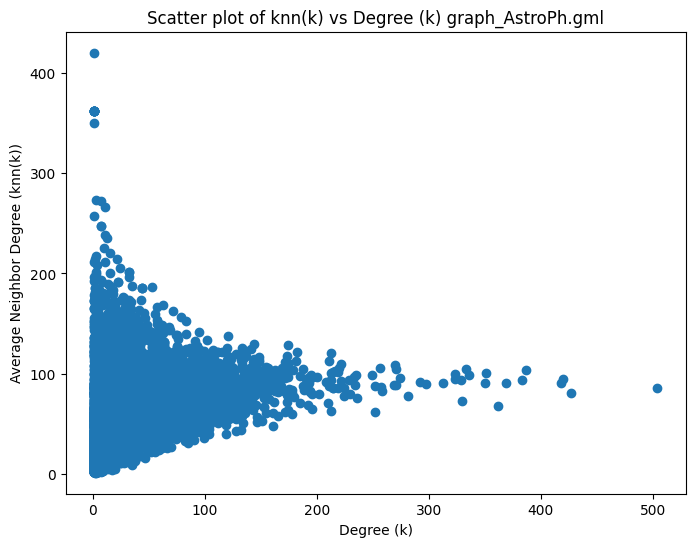

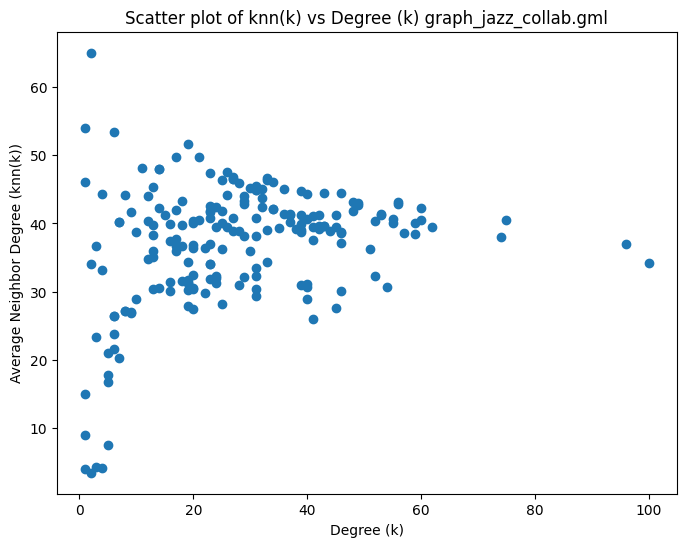

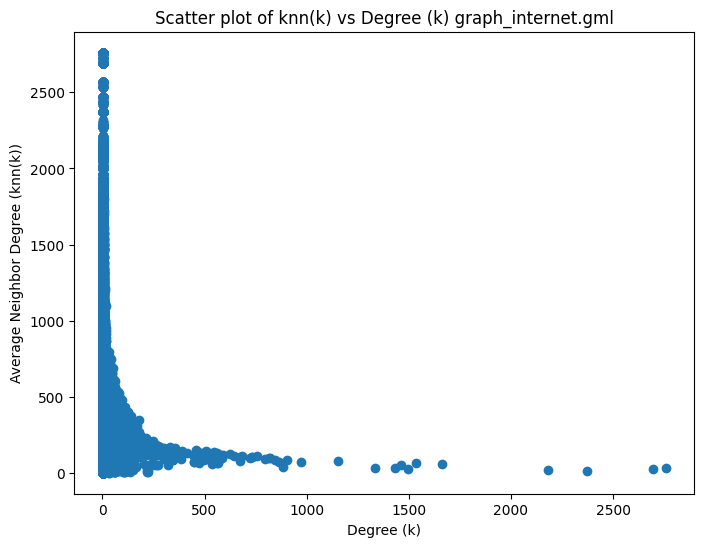

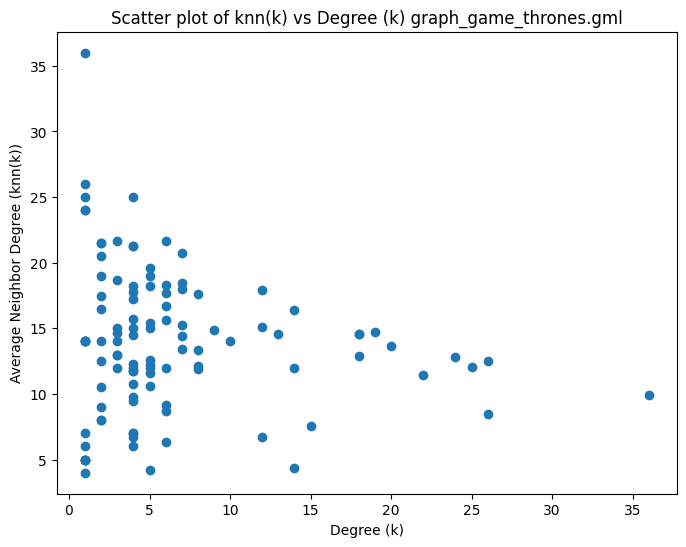

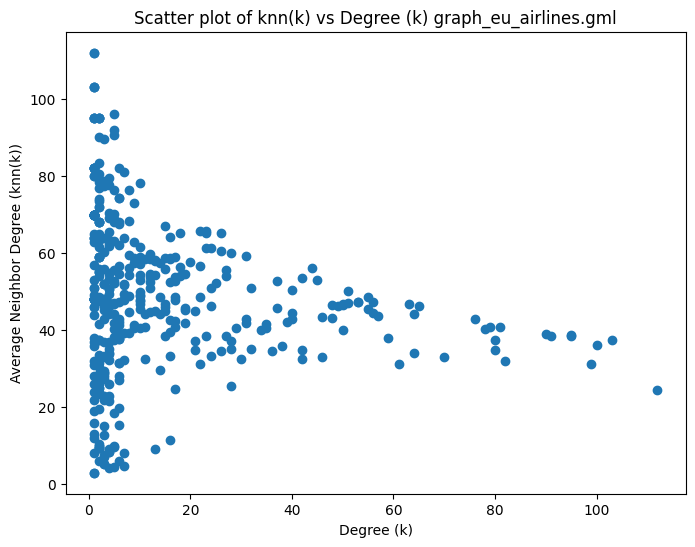

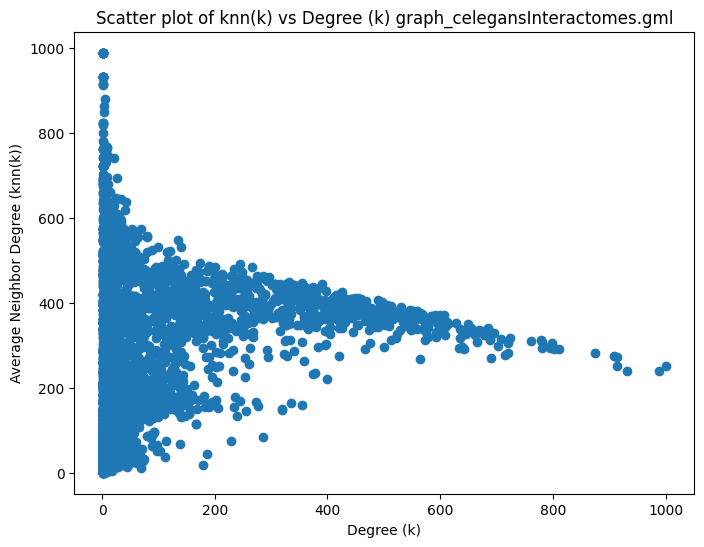

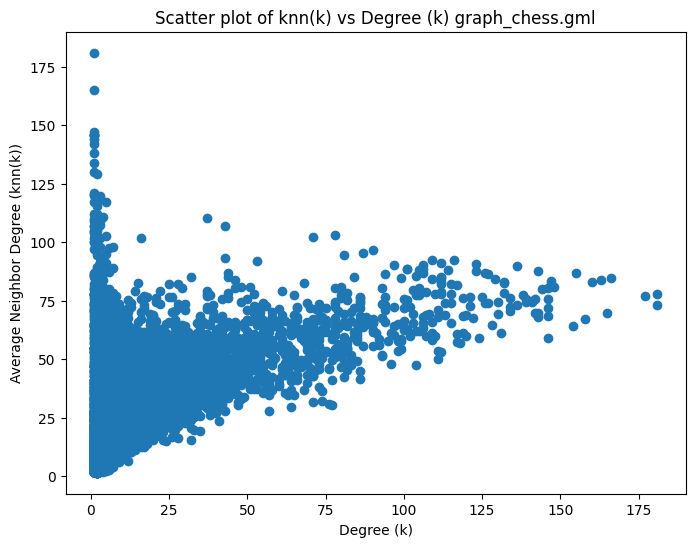

In [18]:
def plot_knn_against_k(graphs: list, degrees: list, annd: list):
    for i, g in enumerate(graphs):
        x, y = zip(*[(degrees[i][n], annd[i][n]) for n in g.nodes()])
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y)
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.show

plot_knn_against_k(graphs, degrees_graphs, annd_graphs)

## 2. 

Plot the same scatter plot from question 1 but using a randomised version of the network. Plot
the distribution in the same figure together with the scatter plot you obtained in question 1.

*Hint: The randomised networks are obtained via multiple edge swaps via the networkx function:
nx.algorithms.smallworld.random_reference. Make sure to set the parameter connectivity =
False to have faster execution.*

In [6]:
graphs_random = [nx.algorithms.smallworld.random_reference(g, connectivity=False) for g in graphs]
annd_graphs_random = [nx.average_neighbor_degree(g) for g in graphs_random]
degrees_graphs_random = [dict(g.degree()) for g in graphs_random]

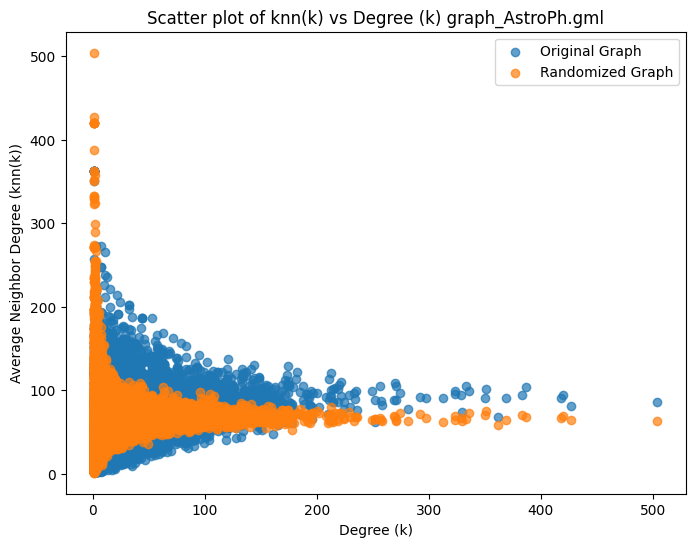

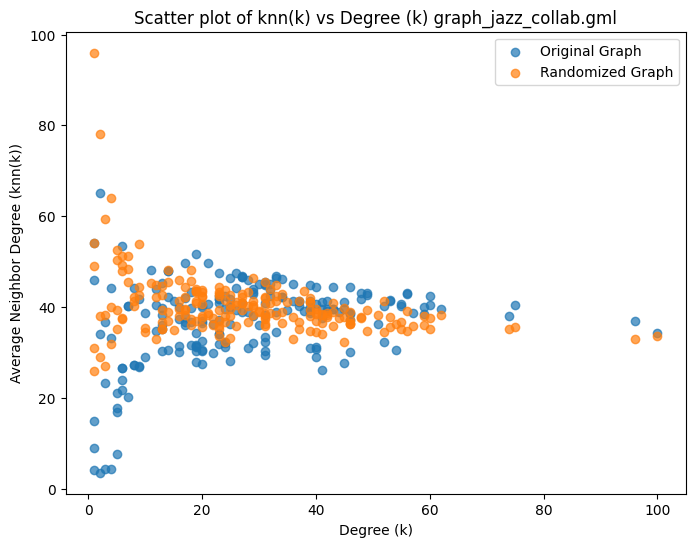

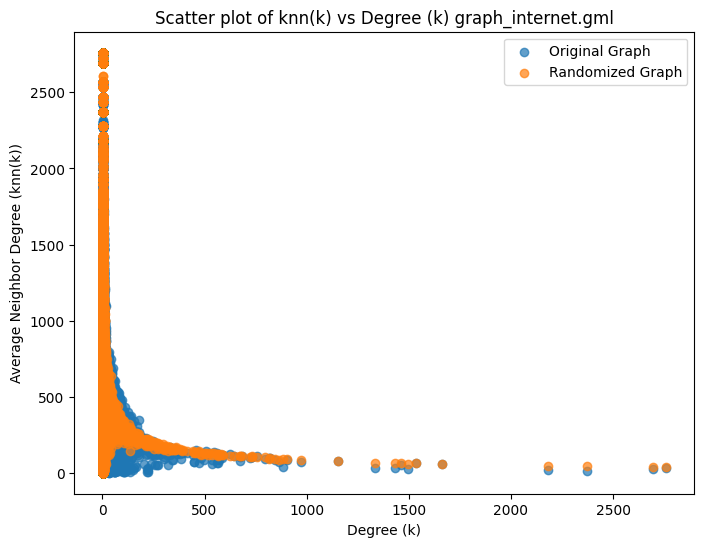

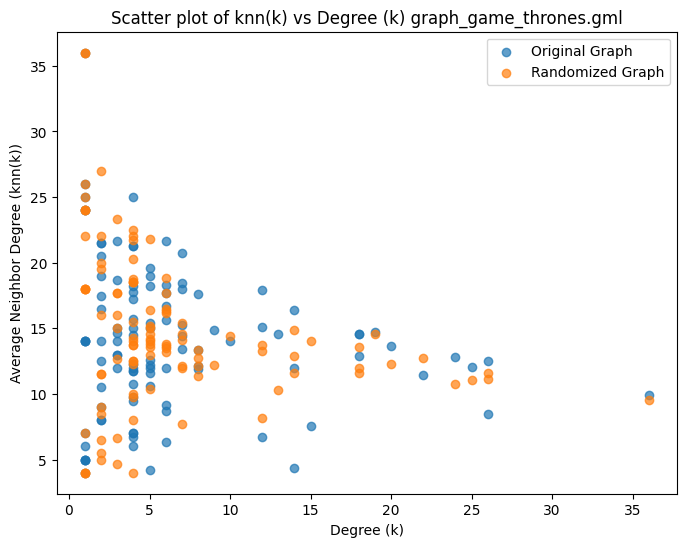

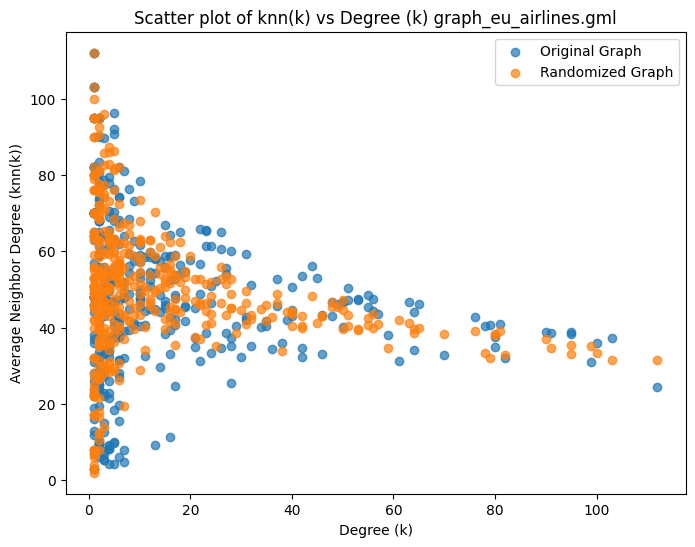

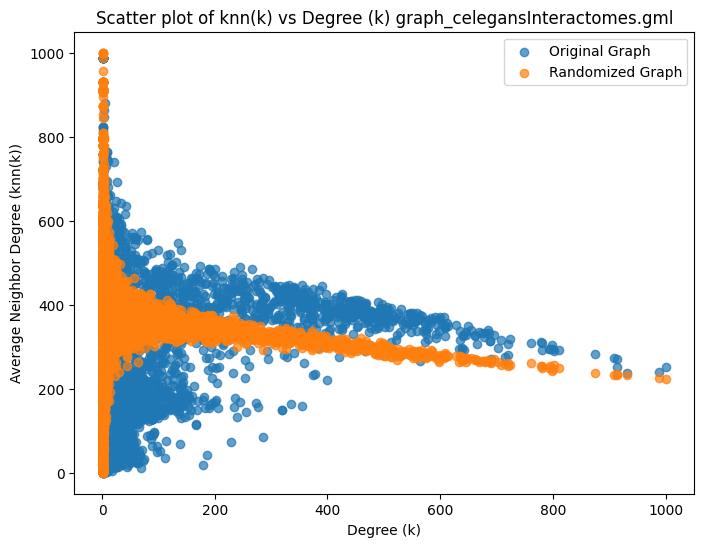

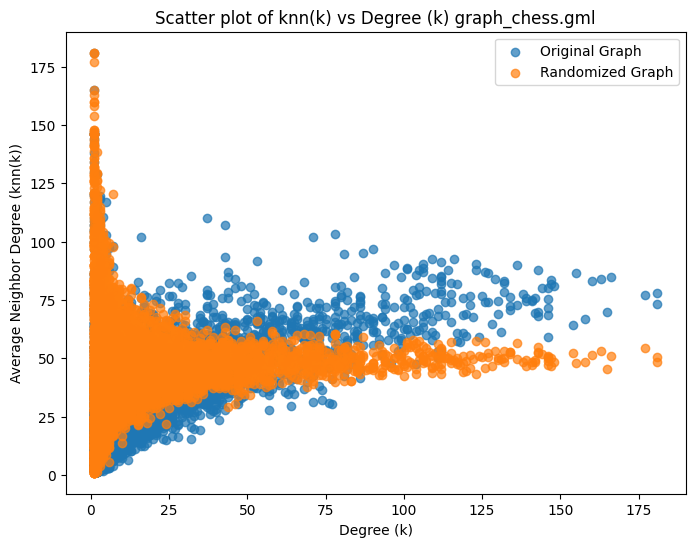

In [15]:
def plot_knn_against_k_with_random(graphs: list):
    for i, _ in enumerate(graphs):
        x, y = zip(
            *[(degrees_graphs[i][n], annd_graphs[i][n]) for n in graphs[i].nodes()]
        )

        x_rand, y_rand = zip(
            *[
                (degrees_graphs_random[i][n], annd_graphs_random[i][n])
                for n in graphs_random[i].nodes()
            ]
        )

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, label="Original Graph", alpha=0.7)
        plt.scatter(x_rand, y_rand, label="Randomized Graph", alpha=0.7)
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.legend()
        plt.show


plot_knn_against_k_with_random(graphs)

# 3. 
Compute the assortativity coefficient of the real network and the randomized network. Put the computed assortativity values in the plot labels of the figure you created in question 2.

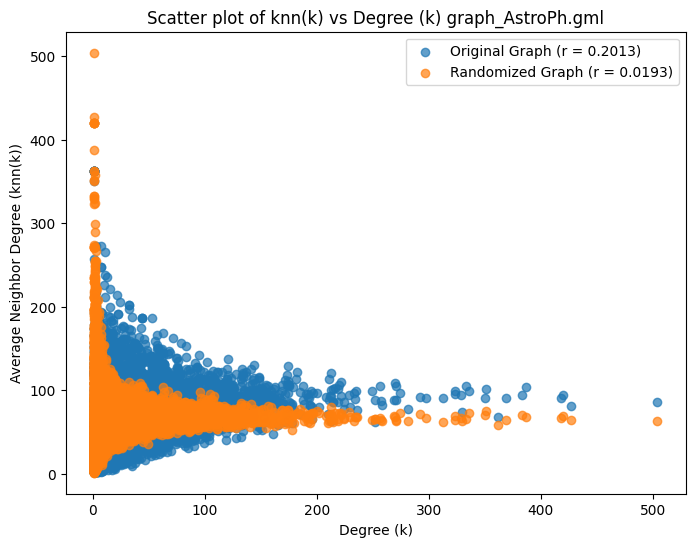

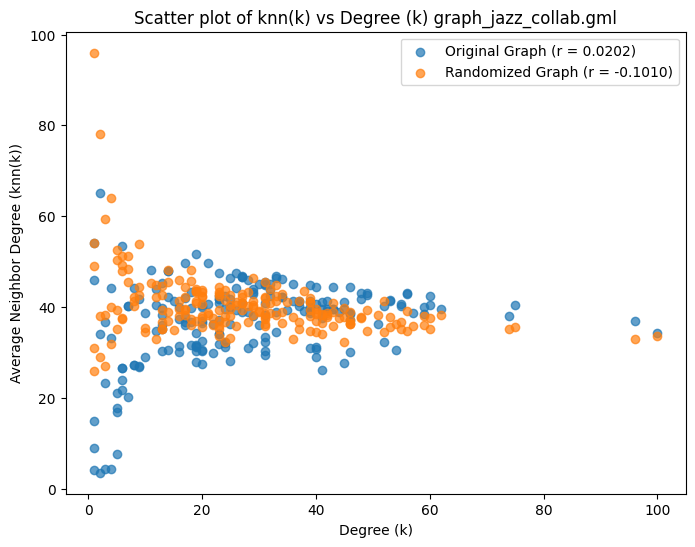

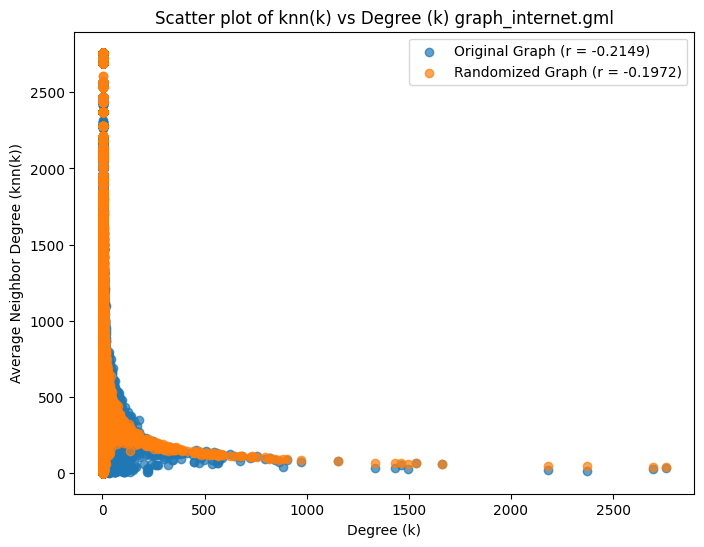

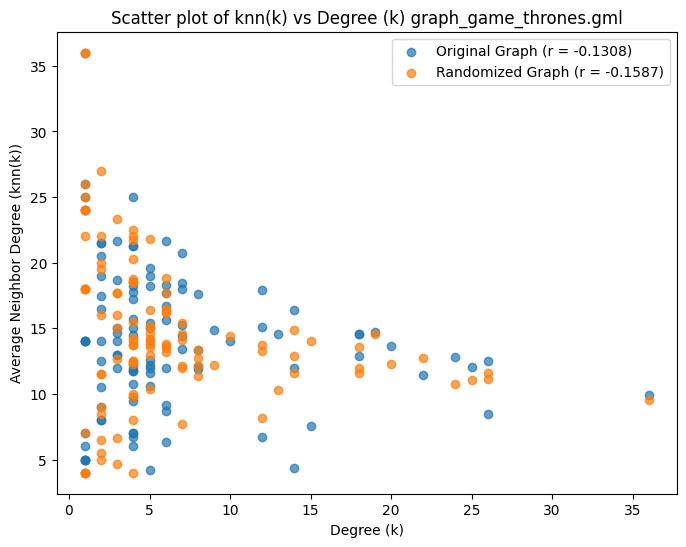

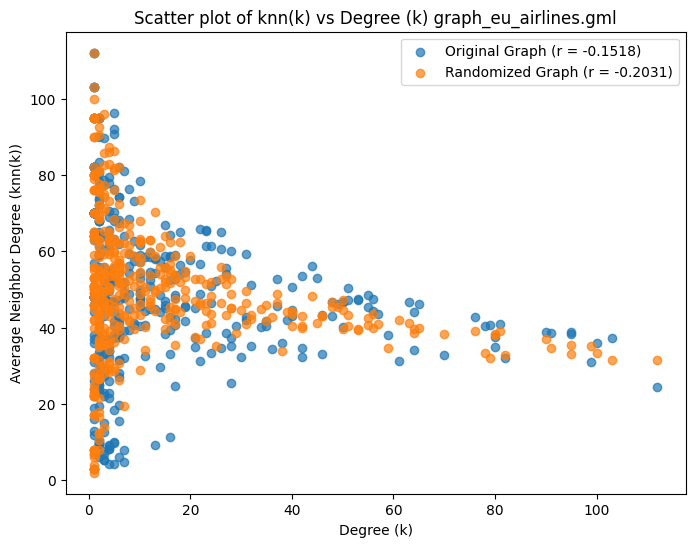

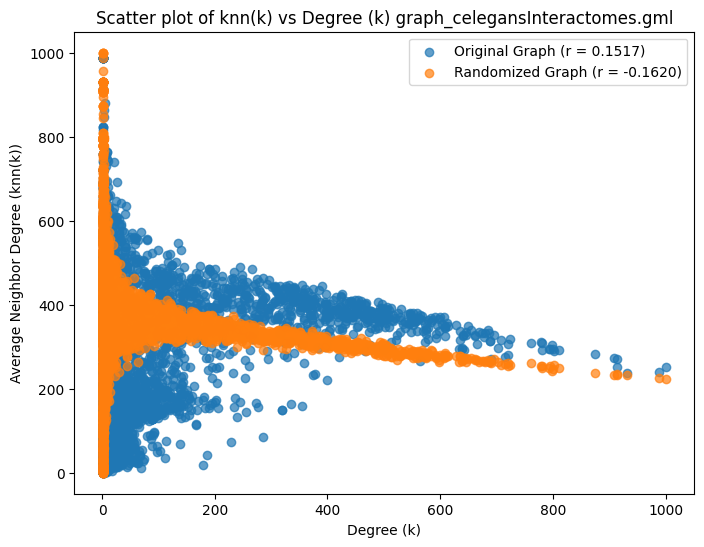

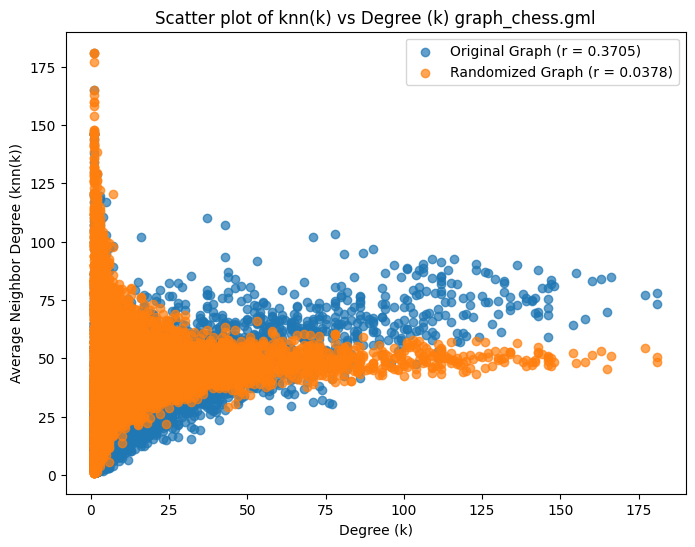

In [14]:
def plot_knn_against_k_with_assortativity(graphs: list):
    for i, _ in enumerate(graphs):
        x, y = zip(
            *[(degrees_graphs[i][n], annd_graphs[i][n]) for n in graphs[i].nodes()]
        )

        x_rand, y_rand = zip(
            *[
                (degrees_graphs_random[i][n], annd_graphs_random[i][n])
                for n in graphs_random[i].nodes()
            ]
        )

        assortativity_original = nx.degree_assortativity_coefficient(graphs[i])
        assortativity_random = nx.degree_assortativity_coefficient(graphs_random[i])

        plt.figure(figsize=(8, 6))
        plt.scatter(
            x, y, label=f"Original Graph (r = {assortativity_original:.4f})", alpha=0.7
        )
        plt.scatter(
            x_rand,
            y_rand,
            label=f"Randomized Graph (r = {assortativity_random:.4f})",
            alpha=0.7,
        )
        plt.xlabel("Degree (k)")
        plt.ylabel("Average Neighbor Degree (knn(k))")
        plt.title(f"Scatter plot of knn(k) vs Degree (k) {gml_files[i]}")
        plt.legend()
        plt.show()


plot_knn_against_k_with_assortativity(graphs)

# 4.

Plot the probability density of degree values p(k) = P(ki = k) ∈ [0, 1] ∀i ∈ V . Use a logarithmic binning and adjust the axis scales accordingly. 

*Hint: look into plt.hist() documentation*

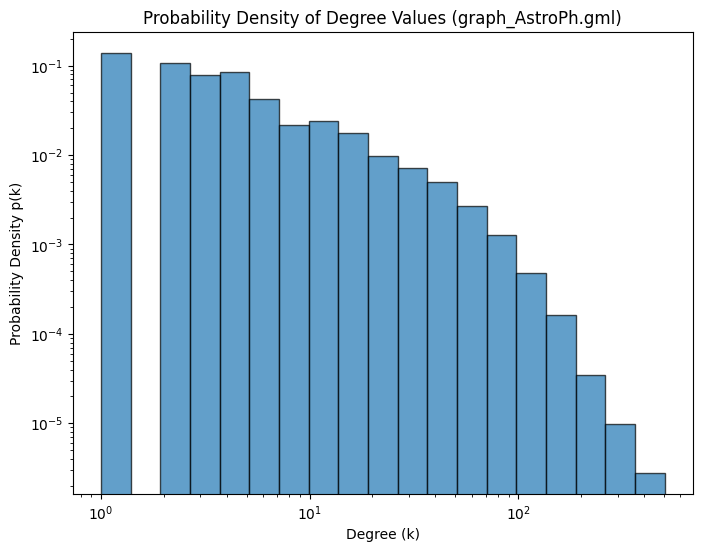

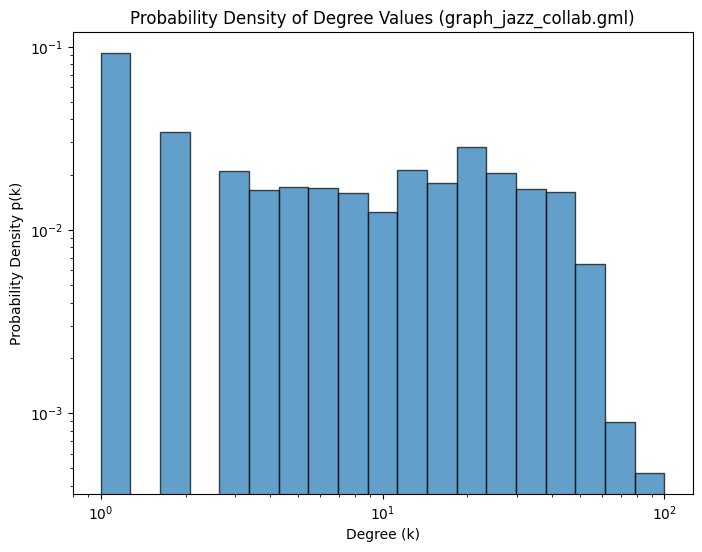

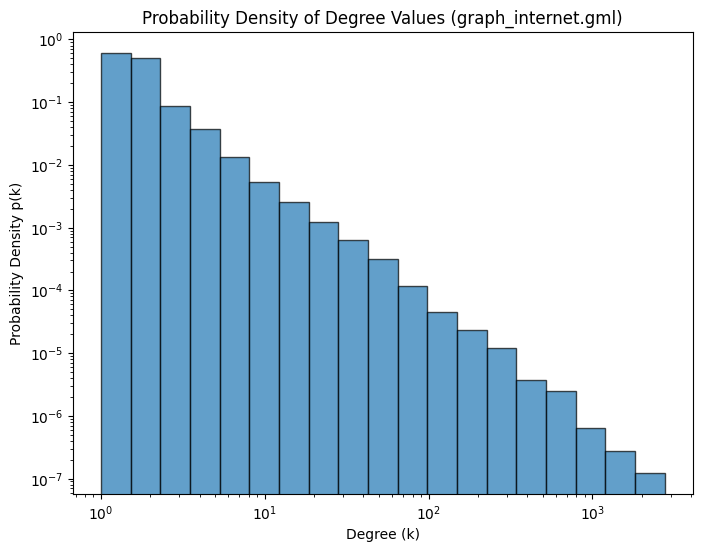

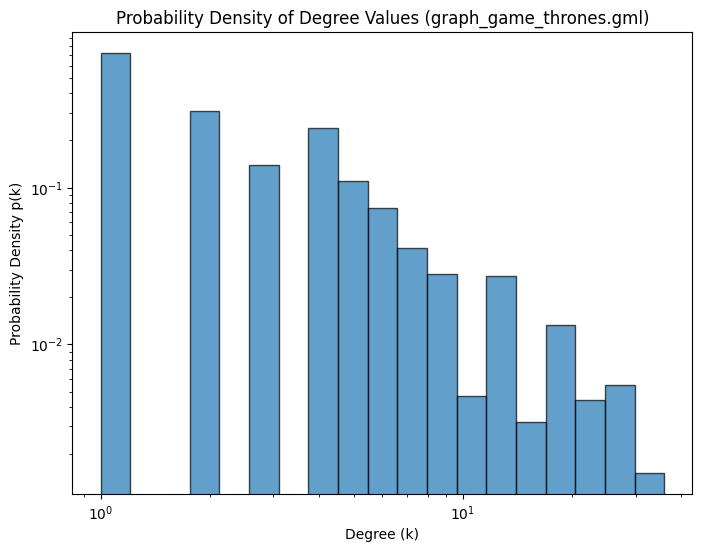

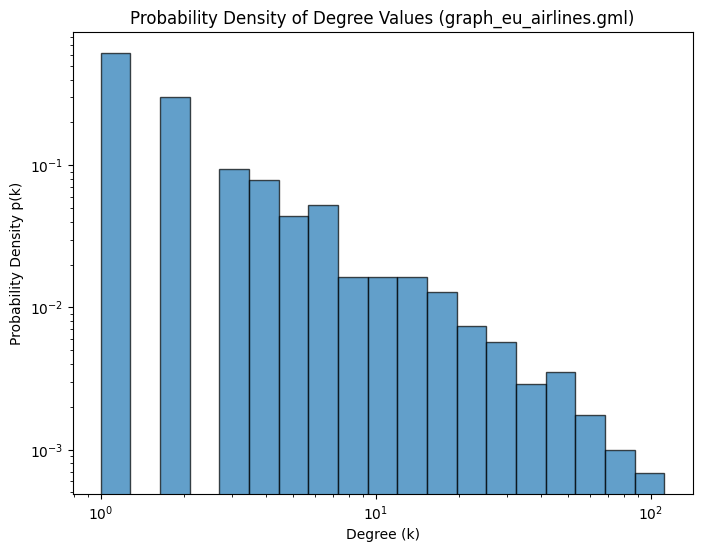

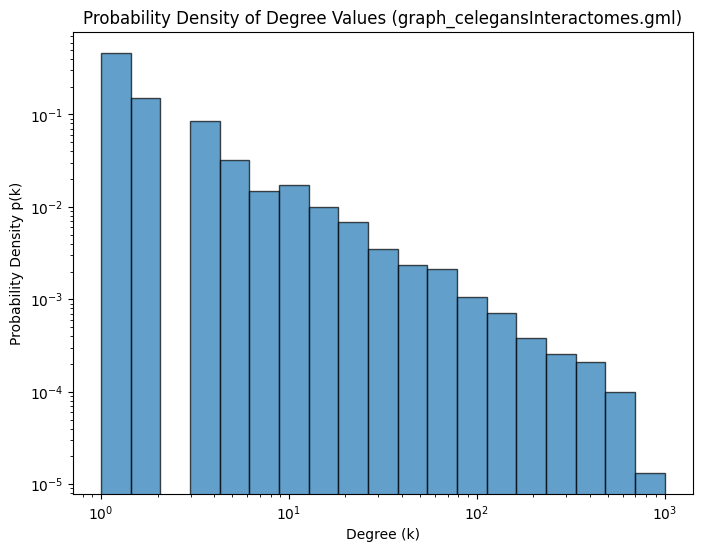

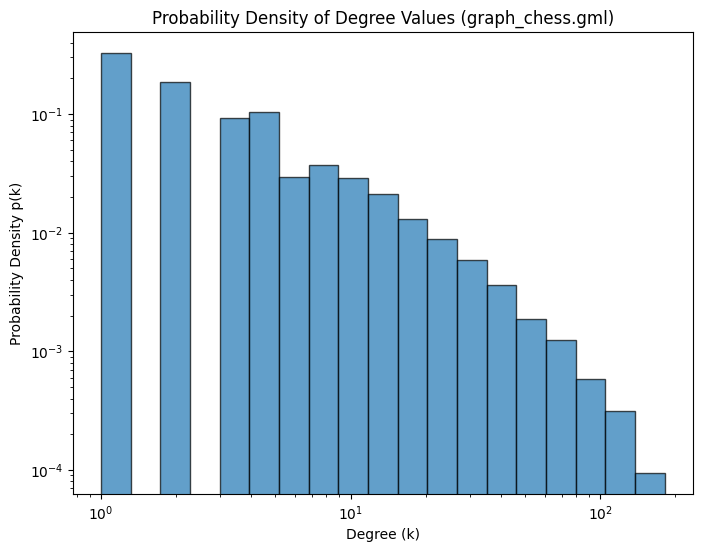

In [13]:
def plot_degree_distribution(graphs):
    for i, g in enumerate(graphs):
        # Compute the degree sequence
        degrees = [degree for node, degree in g.degree()]
        # Remove zero degrees (isolated nodes), if any
        degrees = [d for d in degrees if d > 0]

        # Compute min and max degrees
        min_degree = min(degrees)
        max_degree = max(degrees)

        # Create logarithmically spaced bins
        bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=20)

        # Plot histogram
        plt.figure(figsize=(8, 6))
        plt.hist(degrees, bins=bins, density=True, edgecolor="black", alpha=0.7)

        # Adjust axis scales to logarithmic
        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel("Degree (k)")
        plt.ylabel("Probability Density p(k)")
        plt.title(f"Probability Density of Degree Values ({gml_files[i]})")
        plt.show()


plot_degree_distribution(graphs)

# 5.
For each network, provide a short comment on the plots you produced in the previous 4 questions. Decide whether a Network is assortative or disassortative. Explain your rationale.

# 6. 

Find a dataset representing a disassortative or assortative network. Provide a clear description of the network’s origin and nature, and explain why your network would exhibit assortative/disassortative behavior (Support your claim by repeating the task you performed for question 1‑5).